Thanks to [Reference](https://towardsdatascience.com/sentiment-analysis-in-less-than-50-lines-of-python-fc6451114c6)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweet-sentiment-extraction/train.csv
/kaggle/input/tweet-sentiment-extraction/test.csv
/kaggle/input/tweet-sentiment-extraction/sample_submission.csv


In [3]:
import pandas as pd

training_df = pd.read_csv("/kaggle/input/tweet-sentiment-extraction/train.csv")
training_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
test_df = pd.read_csv("/kaggle/input/tweet-sentiment-extraction/test.csv")
test_df.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [5]:
import re

contractions_dict = {"can`t":"can not",
                     "won`t":"will not",
                     "don`t":"do not",
                     "aren`t":"are not",
                     "i`d":"i would",
                     "couldn`t": "could not",
                     "shouldn`t": "should not",
                     "wouldn`t": "would not",
                     "isn`t": "is not",
                     "it`s": "it is",
                     "didn`t": "did not",
                     "weren`t": "were not",
                     "mustn`t": "must not",
                    }

def prepare_data(df:pd.DataFrame) -> pd.DataFrame:
    
    df["text"] = df["text"] \
              .apply(lambda x: re.split('http:\/\/.*', str(x))[0]) \
              .str.lower() \
              .apply(lambda x: replace_words(x,contractions_dict))
        
    df["label"] = df["sentiment"].map(
                        {"neutral": 1, "negative":0, "positive":2 }
                        )
    return df.text.values, df.label.values

def replace_words(string:str, dictionary:dict):
    for k, v in dictionary.items():
        string = string.replace(k, v)
    return string

train_tweets, train_labels = prepare_data(training_df)
test_tweets, test_labels = prepare_data(test_df)

In [6]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_tweets)

train_tokenized = tokenizer.texts_to_matrix(
                             train_tweets,
                             mode='tfidf'
                             )

test_tokenized = tokenizer.texts_to_matrix(
                             test_tweets,
                             mode='tfidf'
                             )

In [7]:
from  sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
                                n_estimators=500, 
                                min_samples_leaf=2,
                                oob_score=True,
                                n_jobs=-1,
                                )
forest.fit(train_tokenized,train_labels)

print(f"Train score: {forest.score(train_tokenized,train_labels)}")
print(f"OOB score: {forest.oob_score_}")

Train score: 0.7639823878315928
OOB score: 0.6853098504421237


In [8]:
print(f"Test score: {forest.score(test_tokenized,test_labels)}")

Test score: 0.6870401810979061


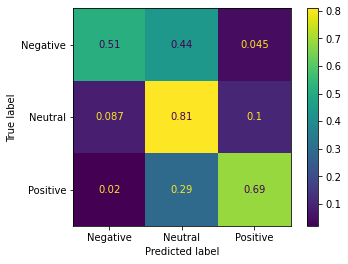

In [9]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(
    forest,
    test_tokenized,
    test_labels,
    display_labels=["Negative","Neutral","Positive"],
    normalize='true'
)

In [13]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 403 kB/s eta 0:00:01


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
vs=[]
for sentence in test_tweets:
    vs.append(analyzer.polarity_scores(sentence)["compound"])
    vader_scores = []
for v in vs:
    if v < -0.5:
        score = 0
    elif v < 0.5:
        score = 1
    else:
        score = 2
    vader_scores.append(score)

In [15]:
vader_scores

[1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
